In [1]:
import csv
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error as MSLE
random.seed(123)
plt.rcParams["font.sans-serif"]=["SimHei"]
from datetime import datetime
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns
path = r"C:\Users\user\Desktop\ETC"

In [2]:
acc_1_fin=pd.read_csv(path+r"/acc1_fin_dummy_and_sd.csv")
print(acc_1_fin.columns)
print(acc_1_fin.shape)

Index(['Unnamed: 0', '回堵情況', '處理時間', '總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數',
       '2-30日內死亡人數', '受傷人數',
       ...
       '肇因研判(子)_44', '肇因研判(子)_48', '肇因研判(子)_49', '肇因研判(子)_50', '肇因研判(子)_65',
       '肇因研判(子)_67', '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object', length=326)
(7242, 326)


In [3]:
acc_1_fin=acc_1_fin.drop("Unnamed: 0",axis = 1)
acc_1_fin=acc_1_fin.drop("回堵情況",axis = 1)
X1 = acc_1_fin.drop("處理時間",axis = 1)
y1 = acc_1_fin["處理時間"]

In [4]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) # 0.2 test_size means 20%

In [5]:
X1.columns

Index(['總通行量', '總平均車速', '里程數', '速限', '24小時內死亡人數', '2-30日內死亡人數', '受傷人數',
       '事故涉及車輛數', '通報地區_北控', '通報地區_南控',
       ...
       '肇因研判(子)_44', '肇因研判(子)_48', '肇因研判(子)_49', '肇因研判(子)_50', '肇因研判(子)_65',
       '肇因研判(子)_67', '是否為連續假日_1', '是否為假日_1', '是否開放路肩_1', '通報級數'],
      dtype='object', length=323)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Random forest

In [7]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={
            'max_features':['sqrt','auto','log2',0.2,0.5,0.1,0.8,0.9],
            'max_depth': range(1,7),
            'n_estimators': range(0,101,10)},
        cv=10, scoring='neg_mean_squared_error',verbose=0,n_jobs=-1,)
grid_result = gsc.fit(X1_train,y1_train)
best_params = grid_result.best_params_
best_params

rfr = RandomForestRegressor(
    max_depth=best_params["max_depth"], 
    n_estimators=best_params["n_estimators"],
    max_features=best_params['max_features'],
    random_state=False, verbose=False)
scores = cross_val_score(rfr, X1_train,y1_train, cv=10, scoring='neg_mean_squared_error')
rfr.fit(X1_train,y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [8]:
## predict_y
rf_1_pred=rfr.predict(X1_test)
rf_1_pred=rf_1_pred.flatten()

In [9]:
# rmse
print(np.sqrt(((y1_test-rf_1_pred)**2).sum()/1451))

26.093084568860426


In [11]:
from sklearn.metrics import mean_absolute_error


In [12]:
print(mean_absolute_error(y1_test,rf_1_pred))

10.054855330535812


In [13]:
var_imp=X1_train.columns[rfr.feature_importances_>0.005]
rfr.feature_importances_[np.where(rfr.feature_importances_>0.005)]

array([0.07822086, 0.08269949, 0.01994531, 0.04067501, 0.09088421,
       0.06677992, 0.0072486 , 0.00539269, 0.00539004, 0.02029968,
       0.00975601, 0.02281317, 0.01548091, 0.01467166, 0.02919494,
       0.02202985, 0.00670463, 0.03078999, 0.06107295, 0.02317165,
       0.01376625, 0.02689067, 0.03703777, 0.00652841, 0.00873379,
       0.01548726, 0.00986338, 0.01934739, 0.11640916])

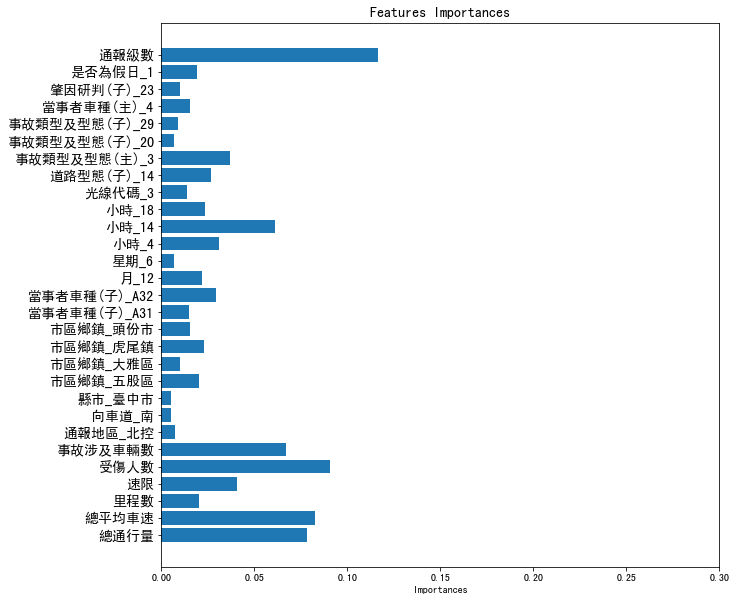

In [38]:
# 係數視覺化
y_importances = rfr.feature_importances_[np.where(rfr.feature_importances_>0.005)]
x_importances = var_imp
y_pos = np.arange(len(x_importances))
plt.figure(figsize=(10,10))
plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances,fontsize=14)
plt.xlabel('Importances')
plt.xlim(0,0.3)
plt.title('Features Importances',fontsize=14)
plt.savefig('rf_select(acc).png',bbox_inches='tight')
plt.show()